In [11]:
pip install --upgrade tensorflow keras tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers 

Note: you may need to restart the kernel to use updated packages.


In [59]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models, transforms


from sklearn import ensemble
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from sklearn import linear_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from tensorflow.keras.applications import resnet50,ResNet50

from tensorflow.keras.preprocessing import image

from tensorflow.keras import layers, models

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.applications.resnet50 import preprocess_input

from sklearn.preprocessing import StandardScaler
 
from sklearn.model_selection import train_test_split


# Contents of Code

### 1 CNN as for Feature Extration and as a Classifier
### 2 ResNet for Feature Extraction
### 3 ViT for Feature Extraction
### 4 Include Validation set to Assess Model's Performance

In [45]:
train_dir = "/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 2/train"
test_dir = "/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 2/test"
val_dir = "/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 2/val"

# 1 CNN for Feature Extraction and a Classifier


In [78]:
train_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_dir,
        target_size=(100, 100),
        batch_size=16)
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir,
        target_size=(100, 100),
        batch_size=16)

Found 1031 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [73]:
print(train_data.class_indices)


{'Angry': 0, 'Surprise': 1}


In [79]:
# We are creating an empty Sequential model, which is a linear stack of layers in Keras. It allows you to build the network layer by layer.
# This is the top block (i.e the first convolutional block)
# It processes the raw image to extract initial features. After that, the subsequent blocks (second and third convolutional blocks below) continue refining the features with higher complexity.#

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3),activation="relu")) 
#This adds a 2D convolutional layer with 32 filters (or kernels) of size 3x3. The input_shape=(100, 100, 3) specifies that the input images are 100x100 pixels with 3 color channels (RGB). 
#The filters are of an arbituary number to start with 
# Relu does 2 things - 1) retain the input signal 2) what needs to be added to the input image to get the intended output

model.add(MaxPooling2D(pool_size=(2, 2)))
#Max Pooling reduces the spatial dimensions of the feature maps by selecting the most important features in each region. It also controls overfitting by reducing the number of parameters in the later layers.

model.add(Dropout(0.2))

/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
# Second Convolution block

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.2))

In [81]:
#Flattening takes the 3D or 2D output from the convolutional layers and reshapes it into a 1D vector.
# Dense layers are fully connected layers where every node is connected to every node in the previous and next layer.
model.add(Flatten())

In [82]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))

In [84]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [85]:
h = model.fit(train_data,
          epochs=10,
          batch_size=16)

Epoch 1/10


/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.5625 - loss: 0.8420
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.7397 - loss: 0.5244
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.8050 - loss: 0.4367
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.7982 - loss: 0.4149
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.8648 - loss: 0.3061
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.8638 - loss: 0.2890
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.9166 - loss: 0.2051
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.9339 - loss: 0.1766
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.9237 - loss: 0.1681
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.9432 - loss: 0.1293


In [86]:
# Evaluate performance of CNN model

model.evaluate(test_data)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8213 - loss: 0.5235


[0.4697231352329254, 0.8265306353569031]

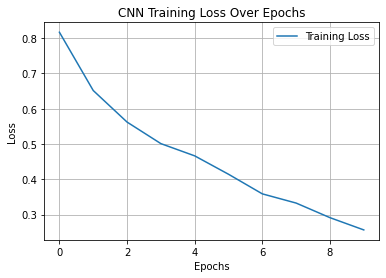

In [109]:
plt.plot(h.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 2 RESNET
### Used for Feature Extraction

ResNet introduces a concept known as residual learning. The main idea is that instead of learning the actual output (direct mapping), the network learns the residuals or differences between the input and the output of a layer, making it easier for the network to optimize.

In [74]:
model = ResNet50(weights='imagenet',input_shape=(50,50,3),include_top=False)

In [76]:
img = cv2.imread("/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 2/train/Angry/0a6cb5a518e6b32758d64ba74c8d789f9a78d13dd4345dd89cab2a48~angry.jpg")

In [77]:
img = cv2.resize(img,(50,50))

In [78]:
img

array([[[ 95, 152, 154],
        [109, 157, 163],
        [110, 155, 159],
        ...,
        [ 93, 110, 135],
        [ 94, 113, 148],
        [ 95, 112, 138]],

       [[ 96, 155, 159],
        [ 96, 150, 157],
        [104, 151, 159],
        ...,
        [ 91, 108, 120],
        [111, 132, 163],
        [ 94, 116, 141]],

       [[168, 200, 215],
        [167, 208, 217],
        [160, 203, 212],
        ...,
        [ 96, 112, 125],
        [105, 127, 161],
        [ 97, 121, 141]],

       ...,

       [[ 38,  49,  57],
        [ 43,  49,  60],
        [ 37,  47,  64],
        ...,
        [ 51,  67,  80],
        [ 53,  73,  88],
        [ 51,  73,  89]],

       [[ 39,  45,  56],
        [ 37,  49,  61],
        [ 37,  48,  62],
        ...,
        [ 42,  55,  65],
        [ 51,  73,  84],
        [ 59,  77,  88]],

       [[ 37,  46,  55],
        [ 37,  49,  61],
        [ 38,  50,  62],
        ...,
        [ 45,  55,  64],
        [ 42,  57,  66],
        [ 55,  73,  84]]

In [79]:
img = image.img_to_array(img)

In [80]:
img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis=0))

In [81]:
img = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [75]:
# Create the train set for RestNet

X_train = []
Y_train = []
counter=1

for i in os.listdir(train_dir):
  for j in os.listdir(train_dir+"/"+i):
    img = cv2.imread(train_dir+"/"+i+"/"+j)
    img = cv2.resize(img,(50,50))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis=0))
    img = model.predict(img)
    img = img.flatten()
    X_train.append(img)
    Y_train.append(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━

In [76]:
# Create the test set for RestNet

X_test = []
Y_test = []
for i in os.listdir(test_dir):
  for j in os.listdir(test_dir+"/"+i):
    img = cv2.imread(test_dir+"/"+i+"/"+j)
    img = cv2.resize(img,(50,50))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis=0))
    img = model.predict(img)
    img = img.flatten()
    X_test.append(img)
    Y_test.append(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

In [96]:
# Logistic Regression
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))

0.8231292517006803
[[123  27]
 [ 25 119]]


In [77]:
# Random Forest

model = ensemble.RandomForestClassifier()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))


0.7857142857142857
[[120  30]
 [ 33 111]]


In [62]:
# SVM using ResNet for Feature Extraction

scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', max_iter=1000)
svm_model.fit(X_train_scaled, Y_train)

# Predict and calculate accuracy
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(Y_test, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy}")
print(confusion_matrix(Y_test,pred))


/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVM Accuracy: 0.826530612244898
[[104  46]
 [ 39 105]]


# 3 VIT
### Used for feature extraction

In [119]:
model = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')


/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [120]:
X_train = []
Y_train = []
counter=1

for i in os.listdir(train_dir):
  for j in os.listdir(train_dir+"/"+i):
    try:
      img = Image.open(train_dir+"/"+i+"/"+j)
      img = img.resize((100, 100))
      img = model(images=img)
      img = img["pixel_values"]
      img = np.array(img)
      img = img.flatten()
      X_train.append(img)
      Y_train.append(i)
    except Exception as e:
      print("counter ", counter, "error ", e)
      counter+=1

In [49]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Check if the arrays are populated correctly
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train shape: (1031, 150528)
Y_train shape: (1031,)


In [121]:
X_test = []
Y_test = []
counter=1

for i in os.listdir(test_dir):
  for j in os.listdir(test_dir+"/"+i):
    try:
      img = Image.open(test_dir+"/"+i+"/"+j)
      img = img.resize((224, 224))
      img = model(images=img)
      img = img["pixel_values"]
      img = np.array(img)
      img = img.flatten()
      X_test.append(img)
      Y_test.append(i)
    except Exception as e:
      print("counter ", counter, "error ", e)
      counter+=1

In [52]:


# Logistic Regression using VIT For Feature Extraaction
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))

0.7108843537414966
[[104  46]
 [ 39 105]]


In [51]:
# Random Forest using VIT  For Feature Extraaction

model = ensemble.RandomForestClassifier()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))


0.8299319727891157
[[134  16]
 [ 34 110]]


In [70]:
# SVM  using VIT For Feature Extraaction
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', max_iter=1000)
svm_model.fit(X_train_scaled, Y_train)

# Predict and calculate accuracy
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(Y_test, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy}")
print(confusion_matrix(Y_test,pred))

/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVM Accuracy: 0.6904761904761905
[[116  34]
 [ 30 114]]


# 4 Including the valdiation set to assess model performance

## 4.1 Prepare the data

In [6]:
train_dir = "/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 2/train"
test_dir = "/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 2/test"
val_dir = "/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 2/val"

In [109]:

# Image data generators to preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train, validation, and test data
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')


Found 1031 images belonging to 2 classes.
Found 155 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


## 4.2 RESNET

In [114]:
# Import ResNet50 from TensorFlow's Keras API
from tensorflow.keras.applications import ResNet50

# Load a pre-trained ResNet50 model and add custom layers for binary classification (Angry, Sad)
resnet_model = models.Sequential()
resnet_model.add(ResNet50(include_top=False, pooling='avg', input_shape=(224, 224, 3)))
resnet_model.add(layers.Dense(2, activation='softmax'))  # 2 classes: Angry and Sad

# Freeze the ResNet layers (you can unfreeze some if you want to fine-tune)
resnet_model.layers[0].trainable = False

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with both training and validation data
resnet_history = resnet_model.fit(train_data, epochs=10, validation_data=val_data, batch_size=32)

# Save the trained ResNet model
resnet_model.save('resnet_model.h5')


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.5045 - loss: 0.7066 - val_accuracy: 0.5419 - val_loss: 0.6784
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.5236 - loss: 0.6925 - val_accuracy: 0.5419 - val_loss: 0.7227
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.4958 - loss: 0.7131 - val_accuracy: 0.6129 - val_loss: 0.6673
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.5748 - loss: 0.6789 - val_accuracy: 0.5677 - val_loss: 0.6707
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6124 - loss: 0.6663 - val_accuracy: 0.6323 - val_loss: 0.6614
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.6113 - loss: 0.6647 - val_accuracy: 0.6323 - val_loss: 0.6576
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.5875 - loss: 0.6642 - val_accuracy: 0.6323 - val_loss: 0.6594
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.6185 - loss: 0.6565 - val_accuracy: 0.6581 - val_loss:

## 4.3 CNN

In [117]:
# Build a simple custom CNN model
cnn_model = models.Sequential()

# First convolutional layer
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers and add fully connected layers
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

# Output layer for 2 classes (Angry, Sad)
cnn_model.add(layers.Dense(2, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model with both training and validation data
cnn_history = cnn_model.fit(train_data, epochs=10, validation_data=val_data, batch_size=32)

# Save the trained CNN model
cnn_model.save('cnn_model.h5')


/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5213 - loss: 1.2229 - val_accuracy: 0.5484 - val_loss: 0.6612
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6928 - loss: 0.6032 - val_accuracy: 0.7161 - val_loss: 0.5701
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7496 - loss: 0.5228 - val_accuracy: 0.7871 - val_loss: 0.5064
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8014 - loss: 0.4427 - val_accuracy: 0.7935 - val_loss: 0.4764
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8147 - loss: 0.4064 - val_accuracy: 0.7742 - val_loss: 0.5116
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8523 - loss: 0.3656 - val_accuracy: 0.7742 - val_loss: 0.5965
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8783 - loss: 0.2979 - val_accuracy: 0.7935 - val_loss: 0.5096
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9047 - loss: 0.2243 - val_accuracy: 0.7806 - val_loss:

# 4.4 VIT


In [110]:
# Load pre-trained ViT model and feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
#model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')


/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [111]:
# Initialize empty lists for X_train and Y_train
X_train = []
Y_train = []

counter = 1

# Loop through each sub-directory in the train directory
for i in os.listdir(train_dir):
    for j in os.listdir(train_dir + "/" + i):
        try:
            # Open and process the image
            img = Image.open(train_dir + "/" + i + "/" + j)
            img = img.resize((100, 100))  # Resize image to a standard size
            img = feature_extractor(images=[img], return_tensors="pt")  # Extract features using ViT
            img = img['pixel_values'].numpy().flatten()  # Convert to NumPy array and flatten it

            # Append to the training data and labels
            if i.lower() == 'angry':  # Ensure label is based on the folder name
                X_train.append(img)
                Y_train.append(0)
            elif i.lower() == 'surprise':
                X_train.append(img)
                Y_train.append(1)

        except Exception as e:
            print(f"counter {counter}, error {e}")
            counter += 1

# Convert lists to arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)

# Check the label distribution to ensure even representation
unique, counts = np.unique(Y_train, return_counts=True)
print(f'Label distribution in Y_train: {dict(zip(unique, counts))}')


Shape of X_train: (1031, 150528)
Shape of Y_train: (1031,)
Label distribution in Y_train: {0: 522, 1: 509}


In [112]:
# Initialize empty lists for X_test and Y_test
X_test = []
Y_test = []

counter = 1

# Loop through each sub-directory in the test directory
for i in os.listdir(test_dir):
    for j in os.listdir(test_dir + "/" + i):
        try:
            # Open and process the image
            img = Image.open(test_dir + "/" + i + "/" + j)
            img = img.resize((100, 100))  # Resize image to a standard size
            img = feature_extractor(images=[img], return_tensors="pt")  # Extract features using ViT
            img = img['pixel_values'].numpy().flatten()  # Convert to NumPy array and flatten it

            # Append to the test data and labels
            if i.lower() == 'angry':  # Ensure label is based on the folder name
                X_test.append(img)
                Y_test.append(0)
            elif i.lower() == 'surprise':
                X_test.append(img)
                Y_test.append(1)

        except Exception as e:
            print(f"counter {counter}, error {e}")
            counter += 1

# Convert lists to arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

# Check the label distribution to ensure even representation
unique, counts = np.unique(Y_test, return_counts=True)
print(f'Label distribution in Y_test: {dict(zip(unique, counts))}')


Shape of X_test: (294, 150528)
Shape of Y_test: (294,)
Label distribution in Y_test: {0: 150, 1: 144}


In [98]:
unique, counts = np.unique(Y_train, return_counts=True)
print(f'Label distribution in Y_train: {dict(zip(unique, counts))}')


Label distribution in Y_train: {0: 522, 1: 509}


In [100]:
# Function to load images, extract features, and labels
def load_images_and_labels_for_ml(directory): 
    features = []
    labels = []
    for label in os.listdir(directory):  
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for img_file in os.listdir(label_dir):
                try:
                    img_path = os.path.join(label_dir, img_file)
                    image = Image.open(img_path).convert("RGB")  
                    inputs = feature_extractor(images=image, return_tensors="pt")
                    flattened_features = inputs['pixel_values'].flatten().numpy()
                    features.append(flattened_features)
                    labels.append(0 if label.lower() == 'angry' else 1)  # Assuming 'angry' is 0 and 'surprise' is 1
                except Exception as e:
                    print(f"Error processing file {img_file}: {e}")
    return features, labels

# Load the full training and test data
X_train, Y_train = load_images_and_labels_for_ml(train_dir)
X_test, Y_test = load_images_and_labels_for_ml(test_dir)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)
print(f'Random Forest Confusion Matrix:\n{rf_conf_matrix}\n')
print(f'Random Forest Model Accuracy: {rf_accuracy * 100:.2f}%')


# Train a Logistic Regression Classifier
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(Y_test, logistic_predictions)
logistic_conf_matrix = confusion_matrix(Y_test, logistic_predictions)
print(f'Logistic Regression Model Accuracy: {logistic_accuracy * 100:.2f}%')
print(f'Logistic Regression Confusion Matrix:\n{logistic_conf_matrix}\n')


Random Forest Confusion Matrix:
[[132  18]
 [ 34 110]]

Random Forest Model Accuracy: 82.31%


/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Accuracy: 71.09%
Logistic Regression Confusion Matrix:
[[104  46]
 [ 39 105]]



In [115]:
## With validation set

# Split the data into training, validation, and test sets (e.g., 60% train, 20% val, 20% test)
X_train, Y_train = load_images_and_labels_for_ml(train_dir)
X_val, Y_val = load_images_and_labels_for_ml(val_dir)
X_test, Y_test = load_images_and_labels_for_ml(test_dir)

# Train a Random Forest Classifier on the training data
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, Y_train)

# Validate the Random Forest model on the validation set
rf_val_predictions = rf_model.predict(X_val)
rf_val_accuracy = accuracy_score(Y_val, rf_val_predictions)
rf_val_conf_matrix = confusion_matrix(Y_val, rf_val_predictions)
print(f'Random Forest Validation Accuracy: {rf_val_accuracy * 100:.2f}%')
print(f'Random Forest Validation Confusion Matrix:\n{rf_val_conf_matrix}\n')

# Final evaluation on the test set (after tuning)
rf_test_predictions = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(Y_test, rf_test_predictions)
rf_test_conf_matrix = confusion_matrix(Y_test, rf_test_predictions)
print(f'Random Forest Test Accuracy: {rf_test_accuracy * 100:.2f}%')
print(f'Random Forest Test Confusion Matrix:\n{rf_test_conf_matrix}\n')


# Train a Logistic Regression Classifier on the training data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)

# Validate the Logistic Regression model on the validation set
logistic_val_predictions = logistic_model.predict(X_val)
logistic_val_accuracy = accuracy_score(Y_val, logistic_val_predictions)
logistic_val_conf_matrix = confusion_matrix(Y_val, logistic_val_predictions)
print(f'Logistic Regression Validation Accuracy: {logistic_val_accuracy * 100:.2f}%')
print(f'Logistic Regression Validation Confusion Matrix:\n{logistic_val_conf_matrix}\n')

# Final evaluation on the test set (after tuning)
logistic_test_predictions = logistic_model.predict(X_test)
logistic_test_accuracy = accuracy_score(Y_test, logistic_test_predictions)
logistic_test_conf_matrix = confusion_matrix(Y_test, logistic_test_predictions)
print(f'Logistic Regression Test Accuracy: {logistic_test_accuracy * 100:.2f}%')
print(f'Logistic Regression Test Confusion Matrix:\n{logistic_test_conf_matrix}\n')


Random Forest Validation Accuracy: 76.77%
Random Forest Validation Confusion Matrix:
[[70 14]
 [22 49]]

Random Forest Test Accuracy: 84.01%
Random Forest Test Confusion Matrix:
[[132  18]
 [ 29 115]]



/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Validation Accuracy: 74.19%
Logistic Regression Validation Confusion Matrix:
[[62 22]
 [18 53]]

Logistic Regression Test Accuracy: 71.09%
Logistic Regression Test Confusion Matrix:
[[104  46]
 [ 39 105]]



In [104]:
#First split: 60% training, 40% temporary (to be split later)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)

# Second split: Split the temporary set into 20% validation, 20% test
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Train an SVM Classifier on the training data
svm_model = SVC(kernel='linear', max_iter=1000)
svm_model.fit(X_train, Y_train)

# Validate the SVM model on the validation set
svm_val_predictions = svm_model.predict(X_val)
svm_val_accuracy = accuracy_score(Y_val, svm_val_predictions)
svm_val_conf_matrix = confusion_matrix(Y_val, svm_val_predictions)
print(f'SVM Validation Accuracy: {svm_val_accuracy * 100:.2f}%')
print(f'SVM Validation Confusion Matrix:\n{svm_val_conf_matrix}\n')

# Final evaluation on the test set (after tuning on validation)
svm_test_predictions = svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(Y_test, svm_test_predictions)
svm_test_conf_matrix = confusion_matrix(Y_test, svm_test_predictions)
print(f'SVM Test Accuracy: {svm_test_accuracy * 100:.2f}%')
print(f'SVM Test Confusion Matrix:\n{svm_test_conf_matrix}\n')

/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVM Model Accuracy: 68.03%
SVM Confusion Matrix:
[[ 81  69]
 [ 25 119]]



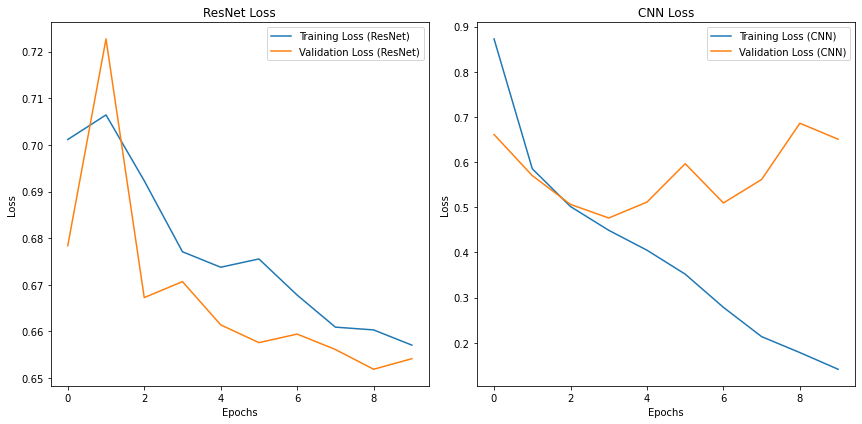

In [118]:
# Plot loss curves for ResNet, CNN, and ViT models
plt.figure(figsize=(18, 6))

# Plot loss curves for ResNet model
plt.subplot(1, 3, 1)
plt.plot(resnet_history.history['loss'], label='Training Loss (ResNet)')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss (ResNet)')
plt.title('ResNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot loss curves for CNN model
plt.subplot(1, 3, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss (CNN)')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss (CNN)')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# # Plot loss curves for ViT model
# plt.subplot(1, 3, 3)
# plt.plot(range(1, len(vit_losses) + 1), vit_losses, label='Training Loss (ViT)')
# plt.title('ViT Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()


plt.tight_layout()
plt.show()
